# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей (объём указан в тысячах баррелей).
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

`Условия задачи:`

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [44]:
import os

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns
sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid', rc={'ytick.left':True, 'ytick.direction':'in',
                              'xtick.bottom':True, 'xtick.direction':'in'})


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Загрузка и подготовка данных

#### Загрузка данных

In [16]:
def get_data(filename):
    
    """
    Reads the data from the given path.
    """

    pth1 = f'/datasets/{filename}'
    pth2 = f'data/{filename}'

    if os.path.exists(pth1):
        df = pd.read_csv(pth1)
        print(f'Reading {pth1}')
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2)
        print(f'Reading {pth2}')
    else:
        print('Check the file path')

    return df

In [28]:
df1 = get_data('geo_data_0.csv')
df2 = get_data('geo_data_1.csv')
df3 = get_data('geo_data_2.csv')

dfs = [df1, df2, df3]

Reading data/geo_data_0.csv
Reading data/geo_data_1.csv
Reading data/geo_data_2.csv


#### Проверка на наличие пропусков и дубликатов

In [29]:
i = 1

for df in dfs:
    print()
    print(f'dataframe {i}')
    print()
    print(df.info())
    print()
    i += 1


dataframe 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


dataframe 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


dataframe 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
D

In [25]:
i = 1

for df in dfs:
    print(f'dataframe {i}')
    print(df.duplicated().sum())
    print()
    i += 1

dataframe 1
0

dataframe 2
0

dataframe 3
0



> Дубликаты и пропуски отстутствуют

> Все признаки численные, поэтому кодирование данных не требуется

#### Проверка на мультиколлинеарные признаки

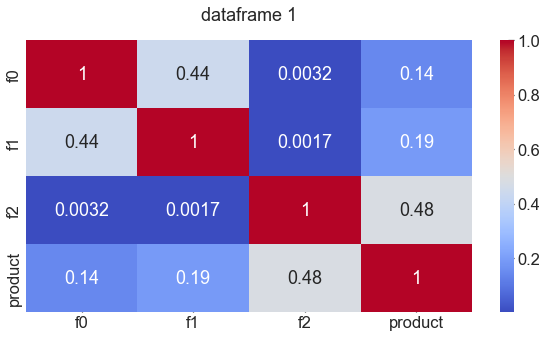

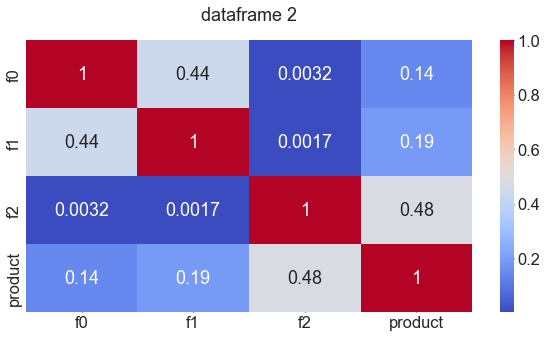

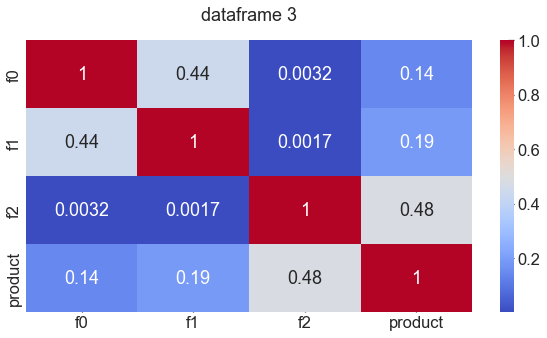

In [43]:
i = 1

for df in dfs:
    fig, ax = plt.subplots(figsize=(10, 5))
    # Create correlation matrix
    corr_matrix = df1.corr().abs()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title(f'dataframe {i}', y=1.05)

    i += 1
# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# # Drop features 
# df.drop(to_drop, axis=1, inplace=True)

> Для всех трех регионов наблюдается повышенная корреляция между признаками `f0` и `f1`. Кроме того, есть корреляция между признаком `f2` и целевой переменной `product`. В обоих случаях корреляция не превышает значения `0.5`, поэтому не может быть определена как сильная.

/var/folders/nc/53ydtkz56jj83586jxv6mvlm0000gn/T/ipykernel_75311/3739229445.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df, alpha=0.02, figsize=(10, 7), diagonal='kde', ax=ax)


******************************
dataframe 1
******************************


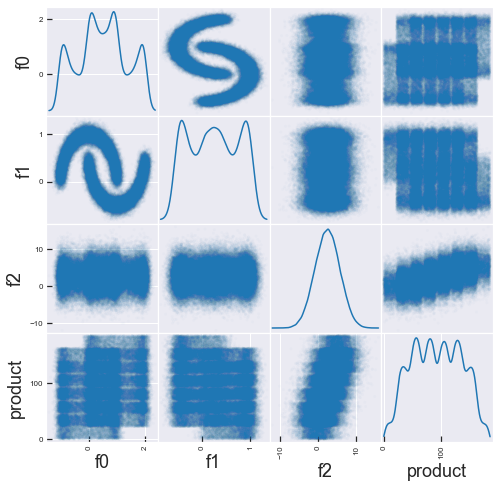

/var/folders/nc/53ydtkz56jj83586jxv6mvlm0000gn/T/ipykernel_75311/3739229445.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df, alpha=0.02, figsize=(10, 7), diagonal='kde', ax=ax)


******************************
dataframe 2
******************************


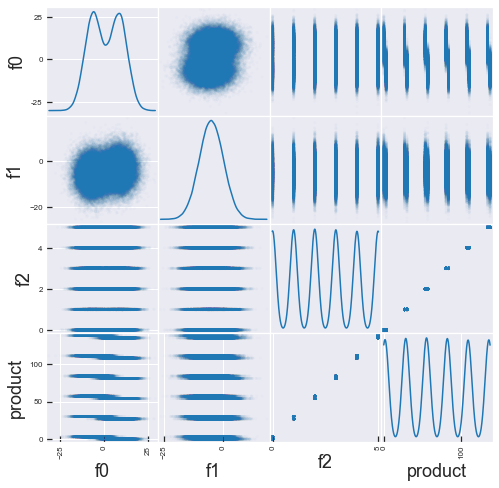

/var/folders/nc/53ydtkz56jj83586jxv6mvlm0000gn/T/ipykernel_75311/3739229445.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df, alpha=0.02, figsize=(10, 7), diagonal='kde', ax=ax)


******************************
dataframe 3
******************************


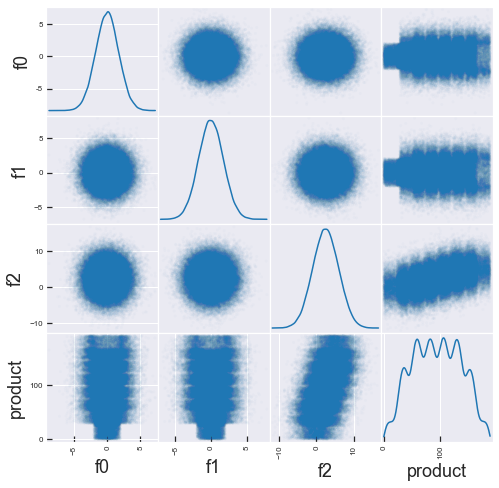

In [58]:
i = 1

for df in dfs:
    fig, ax = plt.subplots(figsize=(8, 8))
    # Create scatter matrix
    pd.plotting.scatter_matrix(df, alpha=0.02, figsize=(10, 7), diagonal='kde', ax=ax)

    print('*' * 30)
    print(f'dataframe {i}')
    i += 1
    plt.show()

> В распределении признаков наблюдаются приведения и галактики, но винить их за это нельзя: данные синтетические

> Подозритлеьно, что для первого региона два нецелевых признака из трех имеют мультимадальное распределение, в то время как для третьего $-$ ни одного

> Подозрительно, в данных по второму региону относительно мало шума

## Обучение и проверка модели

#### Разбиение

In [72]:
features_1 = df1.drop(columns=['product', 'id'])
target_1 = df1['product']

features_2 = df2.drop(columns=['product', 'id'])
target_2 = df2['product']

features_3 = df3.drop(columns=['product', 'id'])
target_3 = df3['product']

In [73]:
def split_data(features, target):
    """
    Splits the data into training and test sets.
    """

    X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=42)

    return X_train, X_valid, y_train, y_valid

In [74]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(features_1, target_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(features_2, target_2)
features_train_3, features_valid_3, target_train_3, target_valid_3 = split_data(features_3, target_3)

In [75]:
print('Split check')
print()
print(f'Train samples contain {len(features_train_1) / len(df1):.0%} of the data')
print(f'Validation samples contain {len(features_valid_1) / len(df1):.0%} of the data')

Split check

Train samples contain 75% of the data
Validation samples contain 25% of the data


#### Масштабирование

In [76]:
def scale_data(X_train, X_valid):
    """
    Scales the data.
    """

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_valid = scaler.transform(X_valid)

    return X_train, X_valid

features_train_1, features_valid_1 = scale_data(features_train_1, features_valid_1)
features_train_2, features_valid_2 = scale_data(features_train_2, features_valid_2)
features_train_3, features_valid_3 = scale_data(features_train_3, features_valid_3)

## Подготовка к расчёту прибыли

## Расчёт прибыли и рисков 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован